Compare Models F1 Scores, Recall Scores and Average Precision Score 

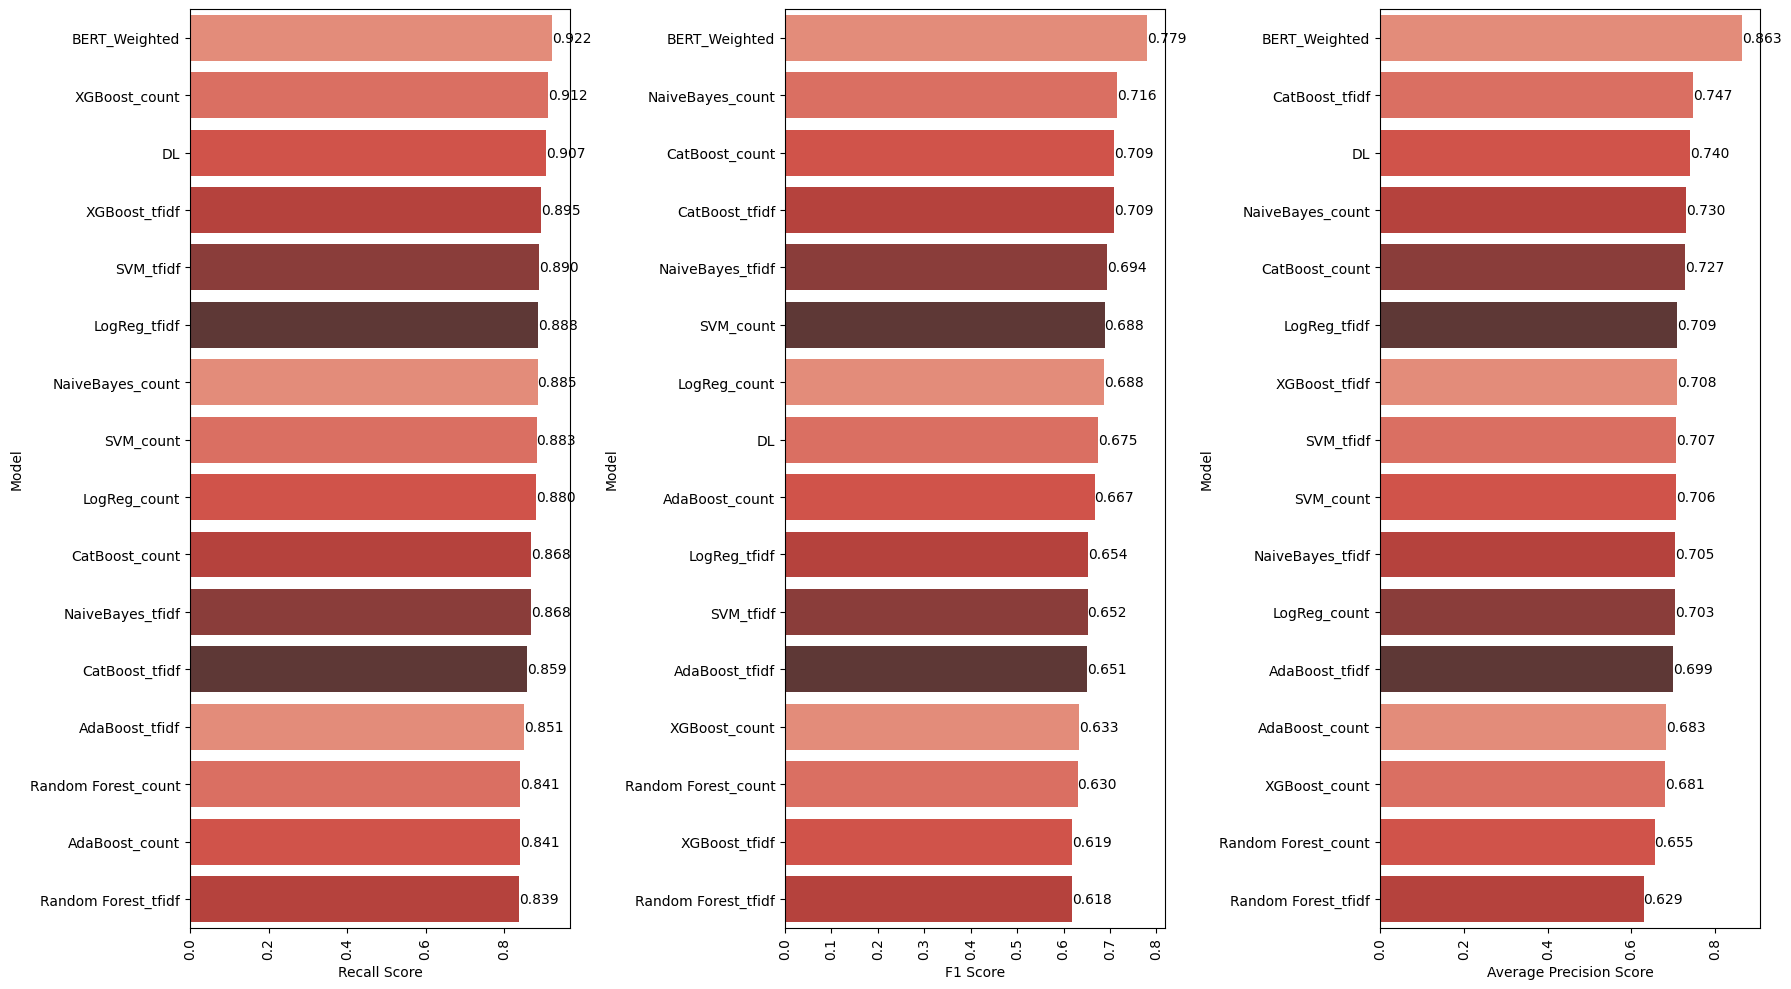

In [423]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "CatBoost_count" , "XGBoost_count","NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "CatBoost_tfidf", "XGBoost_tfidf","DL", "BERT_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, cb_count_f1, xgb_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, cb_tfidf_f1, xgb_tfidf_f1, DL_f1, BERT_with_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, cb_count_rec, xgb_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, cb_tfidf_rec, xgb_tfidf_rec, DL_rec, BERT_with_weighted_rec
                                         ],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, cb_AP_count, xgb_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, cb_AP_tfidf, xgb_AP_tfidf, DL_AP, BERT_with_weighted_AP
                                                ]})




plt.figure(figsize=(18, 10))


red_palette = sns.color_palette("Reds_d")


plt.subplot(131)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax = sns.barplot(x="Recall_Score", y="Model", data=compare, palette=red_palette)
ax.set_xlabel("Recall Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(132)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax = sns.barplot(x="F1_Score", y="Model", data=compare, palette=red_palette)
ax.set_xlabel("F1 Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(133)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax = sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette=red_palette)
ax.set_xlabel("Average Precision Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.tight_layout()
plt.show()



Prediction 

In [408]:
def prep_data(text):
  import tensorflow as tf


  Xids_obs, Xmask_obs = transformation(text)


  dataset_obs = tf.data.Dataset.from_tensor_slices((Xids_obs, Xmask_obs))

  def map_func(Tensor_Xids, Tensor_Xmask):
       return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}

  dataset_obs = dataset_obs.map(map_func)


  batch_size = 32

  obs_ds = dataset_obs.batch(batch_size)

  return obs_ds

In [406]:
women_clothing_reviews = [
    "I loved it, highly recommend it to everyone. Perfect for any occasion!",
    "Fantastic product! Great addition to my wardrobe.",
    "Experienced a major letdown; couldn't relate this piece to the brand's style.",
    "Words can't describe how stylish it is!",
    "Amazing design, but the delivery was delayed, and the product was opened; truly disappointing.",
    "Not as shown in the picture at all. Misleading!",
    "Bad reviews scared me, but I had no issues at all. Pleasantly surprised.",
    "Never encountered a seller this bad before; canceling my order.",
    "Great value for the price. A perfect addition to any wardrobe!",
    "Didn't meet my expectations as I hoped.",
    "Top-notch, deserves five stars!",
    "Issues with the product.",
    "The TV's image quality is very poor. Last night, we gathered with friends at home, ate, drank, chatted. Then we watched the Turkey - England match on TV.",
    "Arrived in just 1 day. Super product for the price. However, people with larger hands may prefer a bigger size. Thanks!",
    "The phone definitely doesn't deserve this price. No new features. However, it's a good phone for those who like a small screen.",
    "An amazing phone but doesn't justify the price.",
    # Additional comments:
    "Stunning outfit! Will definitely turn heads.",
    "Elegant and classy, perfect for a night out.",
    "This dress is a showstopper! Love the attention to detail.",
    "The material feels luxurious, worth every penny.",
    "Disappointed with the fit, doesn't flatter my body shape.",
    "Chic and trendy, a must-have for any fashionista.",
    "I was skeptical, but it exceeded my expectations!",
    "Beautiful color, adds a pop of vibrancy to my wardrobe.",
    "The stitching quality is impressive.",
    "Not the best quality for the price, expected more.",
    "Versatile piece, can be dressed up or down.",
    "The size runs a bit small, consider sizing up.",
    "Absolutely in love with this blouse, a new favorite.",
    "Unique design, stands out from the usual fashion choices.",
    "I had high hopes, but the material feels cheap.",
    "Comfortable and stylish, perfect for everyday wear.",
    "The customer service was exceptional, they addressed my concerns promptly.",
    "Fits like a glove, accentuates all the right curves.",
    "Regret buying it, looks better in the pictures.",
    "Bold and daring, a statement piece for sure.",
    "The delivery was fast, impressed with the service.",
    "Wouldn't recommend, the quality doesn't match the price.",
    "Simple yet elegant, a wardrobe staple.",
    "Not suitable for colder weather, quite thin material.",
    "The color faded after the first wash, disappointed.",
    "Absolutely gorgeous! Can't wait to wear it to the next event.",
    "Runs large, had to get it altered.",
    "The fabric is breathable, perfect for summer.",
    "Hassle-free return process, appreciated the efficiency.",
]
reviews = women_clothing_reviews
reviews[:5]

['I loved it, highly recommend it to everyone. Perfect for any occasion!',
 'Fantastic product! Great addition to my wardrobe.',
 "Experienced a major letdown; couldn't relate this piece to the brand's style.",
 "Words can't describe how stylish it is!",
 'Amazing design, but the delivery was delayed, and the product was opened; truly disappointing.']

In [412]:
obs_ds =prep_data(reviews)
obs_ds

<_BatchDataset element_spec={'input_ids': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None)}>

In [413]:
probs = model3.predict(obs_ds)
probs

2/2 [==============================] - 21s 10s/step


array([[0.12691131],
       [0.13646117],
       [0.9970278 ],
       [0.47497553],
       [0.998622  ],
       [0.9981946 ],
       [0.23699439],
       [0.9976415 ],
       [0.18082085],
       [0.996923  ],
       [0.13232297],
       [0.9978208 ],
       [0.99969125],
       [0.23966023],
       [0.4012327 ],
       [0.7197323 ],
       [0.13905516],
       [0.08056322],
       [0.13290262],
       [0.11729208],
       [0.9966997 ],
       [0.06927341],
       [0.7085906 ],
       [0.07060072],
       [0.15464863],
       [0.998782  ],
       [0.08484194],
       [0.25997117],
       [0.10841021],
       [0.07646021],
       [0.9997798 ],
       [0.09019986],
       [0.26046336],
       [0.10129613],
       [0.99265206],
       [0.08355397],
       [0.30036342],
       [0.99918836],
       [0.10905975],
       [0.99860686],
       [0.9969474 ],
       [0.15183887],
       [0.9955793 ],
       [0.09197196],
       [0.2089177 ]], dtype=float32)

In [414]:
probs = [i[0] for i in probs]
probs

[0.12691131,
 0.13646117,
 0.9970278,
 0.47497553,
 0.998622,
 0.9981946,
 0.23699439,
 0.9976415,
 0.18082085,
 0.996923,
 0.13232297,
 0.9978208,
 0.99969125,
 0.23966023,
 0.4012327,
 0.7197323,
 0.13905516,
 0.08056322,
 0.13290262,
 0.11729208,
 0.9966997,
 0.06927341,
 0.7085906,
 0.07060072,
 0.15464863,
 0.998782,
 0.08484194,
 0.25997117,
 0.10841021,
 0.07646021,
 0.9997798,
 0.09019986,
 0.26046336,
 0.10129613,
 0.99265206,
 0.08355397,
 0.30036342,
 0.99918836,
 0.10905975,
 0.99860686,
 0.9969474,
 0.15183887,
 0.9955793,
 0.09197196,
 0.2089177]

In [415]:
classes  = (np.array(probs) >= 0.5).astype("int")
classes

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0])

In [417]:
my_dict = {"Review":reviews, "prob":probs, "classes":classes}

In [418]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(my_dict)

,Review,prob,classes
0,"I loved it, highly recommend it to everyone. Perfect for any occasion!",0.126911,0
1,Fantastic product! Great addition to my wardrobe.,0.136461,0
2,Experienced a major letdown; couldn't relate this piece to the brand's style.,0.997028,1
3,Words can't describe how stylish it is!,0.474976,0
4,"Amazing design, but the delivery was delayed, and the product was opened; truly disappointing.",0.998622,1
5,Not as shown in the picture at all. Misleading!,0.998195,1
6,"Bad reviews scared me, but I had no issues at all. Pleasantly surprised.",0.236994,0
7,Never encountered a seller this bad before; canceling my order.,0.997642,1
8,Great value for the price. A perfect addition to any wardrobe!,0.180821,0
9,Didn't meet my expectations as I hoped.,0.996923,1


Summary 

<a id="summary"></a>

# Sentiment Analysis of Women's Clothes Reviews

In this project, we employed **sentiment analysis** to determine whether a product is recommended or not. Various machine learning algorithms were utilized to enhance prediction accuracy, including:

- ML algorithms (*Logistic Regression*, *Naive Bayes*, *Support Vector Machine (SVM)*, *Random Forest*, *Ada Boosting*, *CatBoost*, and *XGBoost*)
- Deep learning algorithm
- *BERT* algorithm

The dataset is sourced from Women's Clothing Reviews, accessible on [Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews).

After thorough examination, it was evident that the **BERT model** outperformed other models, leading to predictions based on its outcomes.
